## 2. 데이터 전처리

In [1]:
# import 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("./data/diabetes_for_test.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1) 이상치

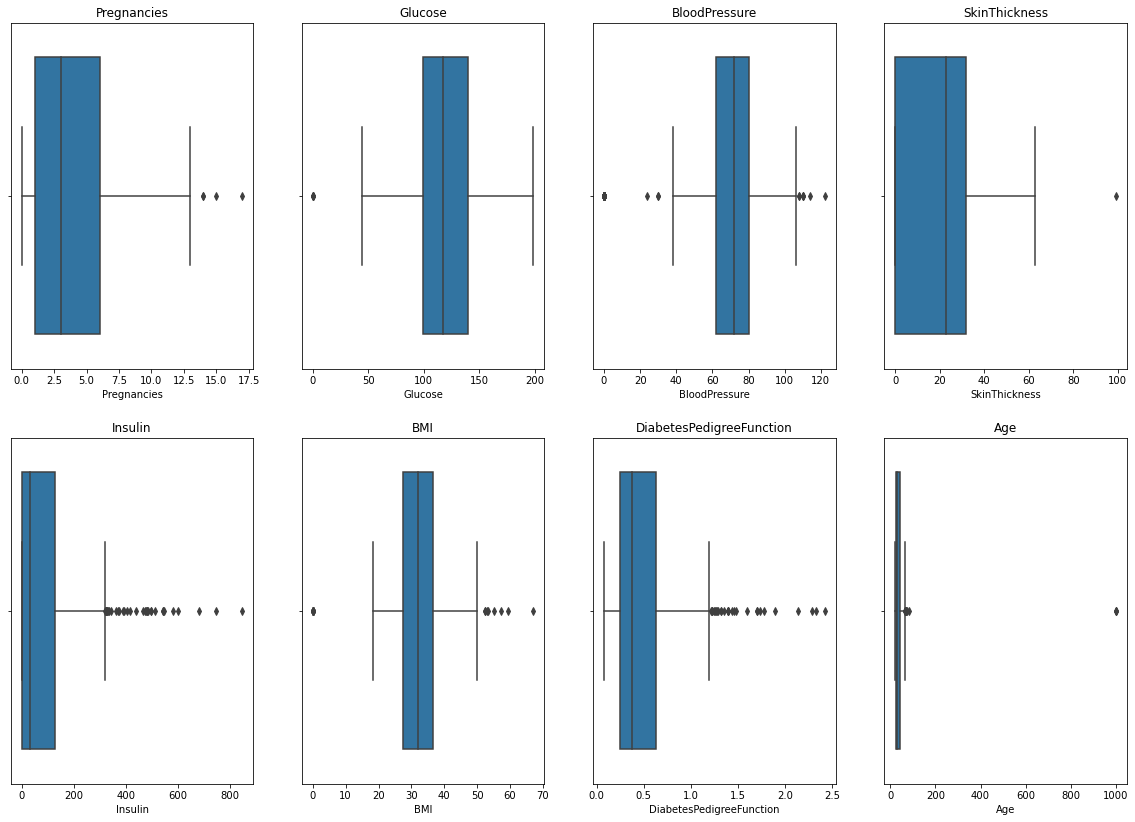

In [2]:
# boxplot을 이상치 시각화

fig, axes = plt.subplots(2,4, figsize=(20,14))

for i in range(4):
    sns.boxplot(x= df.columns[i],ax=axes[0][i],data=df)
    axes[0][i].set_title(df.columns[i])

for i in range(4):
    sns.boxplot(x= df.columns[i+4],ax=axes[1][i],data=df)
    axes[1][i].set_title(df.columns[i+4])
    
plt.show()

In [3]:
# 방법 1: IQR
# 유의사항: 많은 데이터를 이상치로 간주할 위험이 있으므로 데이터의 유형을 살펴보고 필요에 따라 IQR에 곱하는 값을 조정할 수 있도록 하자

def outliers_iqr(dt,col):
    quartile_1, quartile_3 = np.percentile(dt[col],[25,75])
    iqr = quartile_3- quartile_1
    lower_whis = quartile_1 - (iqr*1.5)
    upper_whis = quartile_3 + (iqr*1.5)
    outliers = dt[(dt[col]> upper_whis) | (dt[col]<lower_whis)]
    return outliers[[col]]

outliers = outliers_iqr(df, 'Insulin')
outliers.head()
print('이상치 수: ', len(outliers))

이상치 수:  34


In [4]:
# 이상치 처리 방법 - 삭제
df_copy = df.copy()

drop_outliers = df_copy.drop(index = outliers.index)
print('이상치 처리 전: ', df.shape)
print('이상치 처리 후: ', drop_outliers.shape)

이상치 처리 전:  (768, 9)
이상치 처리 후:  (734, 9)


In [5]:
# 이상치 처리 방법 - 평균 대체

# 이상치를 NAN으로 변경
df_copy.loc[outliers.index,'Insulin'] = np.NAN

# NAN이 된 이상치를 평균값으로 변경

df_copy['Insulin'] = df_copy['Insulin'].fillna(df_copy['Insulin'].mean())
df_copy.loc[outliers.index, 'Insulin'].head()


8      62.328338
13     62.328338
54     62.328338
111    62.328338
139    62.328338
Name: Insulin, dtype: float64

In [6]:
# 이상치 처리 방법 - 중앙값 대체

outlier_index = df_copy[df_copy['Age']>400].index
df_copy.loc[outlier_index,'Age'] = df_copy.Age.median()

### 2) 범주형 변수 처리

In [7]:
df= pd.read_csv('./data/student_data.csv')
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


In [8]:
# pd.get_dummies(data, columns=[])
pd.get_dummies(df, columns=['school','sex','paid','activities'])

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_GP,school_MS,sex_F,sex_M,paid_no,paid_yes,activities_no,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6,1,0,1,0,1,0,1,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5,1,0,1,0,1,0,1,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8,1,0,1,0,0,1,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14,1,0,1,0,0,1,0,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9,0,1,0,1,0,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16,0,1,0,1,1,0,1,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8,0,1,0,1,1,0,1,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12,0,1,0,1,1,0,1,0


## 2) 데이터 분할

In [9]:
# 무작위 임의추출
# 클래스 불균형이 없을 때 혹은 종속변수가 연속형 변수일 때

from sklearn.model_selection import train_test_split


X = df.drop('grade',axis=1)
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2022)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(276, 13) (276,)
(119, 13) (119,)


In [10]:
# 층화 임의 추출 
# 클래스 불균형이 존재할 때 혹은 종쇽변수가 범주형 변수인 경우
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data/diabetes_for_test.csv")
X = df.drop(columns=['Outcome'])
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2022, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(537, 8) (537,)
(231, 8) (231,)


## 3) 데이터 스케일링
#### 주의) 스케일링을 진행할 때는 범주형 변수는 제외하고 진행해야 한다.

In [11]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
X= df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, stratify=y)

### (1) Standard Scaler
- 표준화 방식의 기본 스케일링
- 평균이 0 분산이 1인 정규분포로 스케일링
- 최솟값과 최댓값의 크기를 제한하지 않아 이상치에 민감하기 때문에 이상치를 처리한 후 사용하는 것이 좋음
- 회귀보다 분류분석에서 유용함

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Train 데이터의 fitting과 스케일링
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Test 데이터 스케일링
X_test_sc = scaler.transform(X_test)

# 결과 확인 
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-3.06, 12.33) (-0.00, 1.00)
Test_scaled (-2.30, 14.43) (0.07, 1.12)


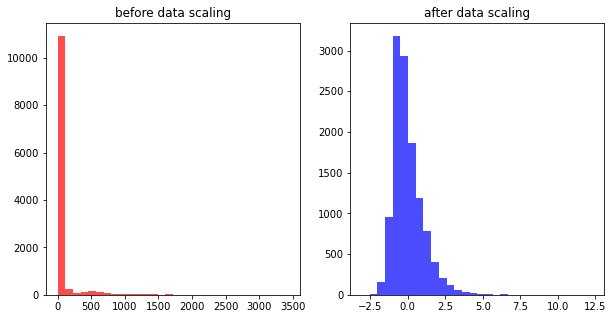

In [14]:
# 시각화 결과

# 스케일링 데이터
X_train_scaled_ss = X_train_sc.reshape(398*30,1)

# 오리지널 데이터
X_train_data = np.array(X_train).reshape(398*30,1)

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
axes[0].set_title('before data scaling')
axes[1].hist(X_train_scaled_ss, bins=30, color= 'blue', alpha = 0.7)
axes[1].set_title('after data scaling')

plt.show()

### (2) Min-max Scaler
- 정규화 방식으로 컬럼들을 0과 1사이 값으로 스케일링
- 최솟값이 0, 최댓값이 1
- 이상치에 민감하므로 이상치 처리 후 수행하는 것이 좋음
- 분류보다 회귀에 유용함

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Test 데이터 스케일링
X_test_sc = scaler.transform(X_test)

# 결과 확인 
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.25, 0.18)
Test_scaled (-0.05, 2.37) (0.26, 0.20)


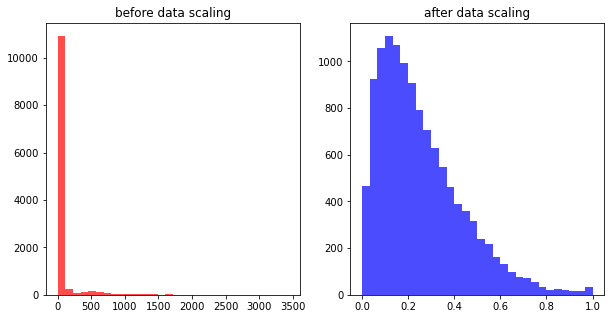

In [16]:
# 시각화 결과

# 스케일링 데이터
X_train_scaled_ss = X_train_sc.reshape(398*30,1)

# 오리지널 데이터
X_train_data = np.array(X_train).reshape(398*30,1)

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
axes[0].set_title('before data scaling')
axes[1].hist(X_train_scaled_ss, bins=30, color= 'blue', alpha = 0.7)
axes[1].set_title('after data scaling')

plt.show()

### (3) MAX Abs Scaler
- 최대절대값과 0이 각각 1,0이 되도록 스케일링
- -1과 1사이에서 표현
- 데이터가 양수인 경우 Min-max Scaler과 동일
- 이상치에 민감
- 분류보다는 회귀분석에 유용

In [17]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Test 데이터 스케일링
X_test_sc = scaler.transform(X_test)

# 결과 확인 
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.35, 0.21)
Test_scaled (0.00, 2.33) (0.36, 0.22)


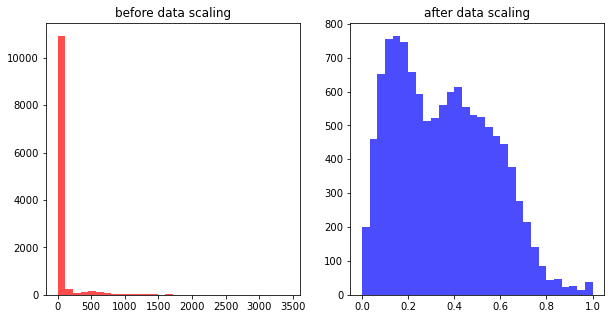

In [18]:
# 시각화 결과

# 스케일링 데이터
X_train_scaled_ss = X_train_sc.reshape(398*30,1)

# 오리지널 데이터
X_train_data = np.array(X_train).reshape(398*30,1)

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
axes[0].set_title('before data scaling')
axes[1].hist(X_train_scaled_ss, bins=30, color= 'blue', alpha = 0.7)
axes[1].set_title('after data scaling')

plt.show()

### (4) Robust Scaler
- 평균과 분산 대신 중앙값과 사분위 값을 활용
- 중앙값을 0으로 설정하고 IQR을 사용하여 이상치의 영향을 최소화함
- quantitle_range(default (0.25,0.75))를 조정하여 더 넓거나 좁은 범위의 값을 이상치로 설정하여 정제 가능

In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Test 데이터 스케일링
X_test_sc = scaler.transform(X_test)

# 결과 확인 
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.25, 15.17) (0.20, 0.90)
Test_scaled (-1.69, 18.85) (0.27, 1.04)


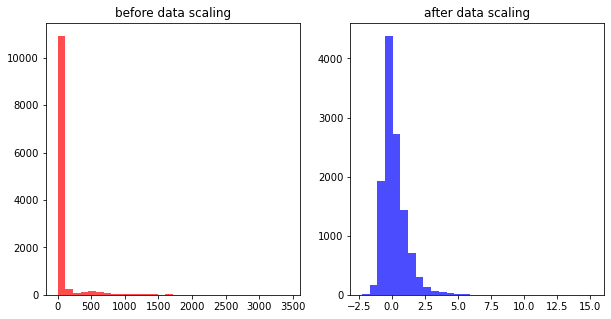

In [20]:
# 시각화 결과

# 스케일링 데이터
X_train_scaled_ss = X_train_sc.reshape(398*30,1)

# 오리지널 데이터
X_train_data = np.array(X_train).reshape(398*30,1)

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
axes[0].set_title('before data scaling')
axes[1].hist(X_train_scaled_ss, bins=30, color= 'blue', alpha = 0.7)
axes[1].set_title('after data scaling')

plt.show()

### (5) Normalizer
- 앞의 4가지 방법은 각 피처(feature)의 통계치를 이용합니다.즉, 열(columns)를 대상
- Normalizer 의 경우 각 행(row)마다 정규화가 진행
- 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만듦
- 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수 있음

In [21]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()

# Train 데이터의 fitting과 스케일링
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Test 데이터 스케일링
X_test_sc = scaler.transform(X_test)

# 결과 확인 
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 0.92) (0.06, 0.17)
Test_scaled (0.00, 0.89) (0.06, 0.17)


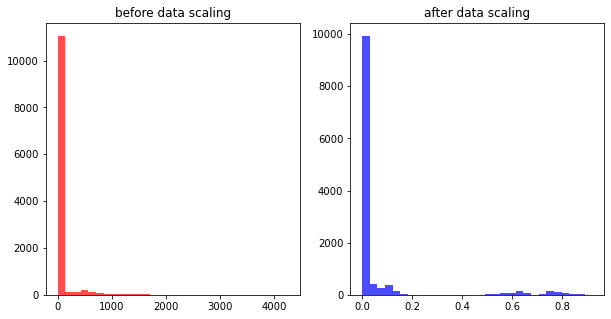

In [42]:
# 시각화 결과

# 스케일링 데이터
X_train_scaled_ss = X_train_sc.reshape(398*30,1)

# 오리지널 데이터
X_train_data = np.array(X_train).reshape(398*30,1)

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
axes[0].set_title('before data scaling')
axes[1].hist(X_train_scaled_ss, bins=30, color= 'blue', alpha = 0.7)
axes[1].set_title('after data scaling')

plt.show()

### (6) PowerTransformer
- 데이터를 정규분포에 가깝게 만들어 줌
- 데이터의 왜곡(skewness)을 줄이고, 이상치의 영향을 완화시키며, 선형 모델이나 기타 모델의 성능을 향상시키기 위해 사용됨

In [22]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(standardize=True, method='yeo-johnson') # method를 'box-cox'로 바꿀 수 있음

# Train 데이터의 fitting과 스케일링
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Test 데이터 스케일링
X_test_sc = scaler.transform(X_test)

# 결과 확인 
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-3.73, 3.68) (0.00, 1.00)
Test_scaled (-3.33, 3.56) (0.06, 1.03)


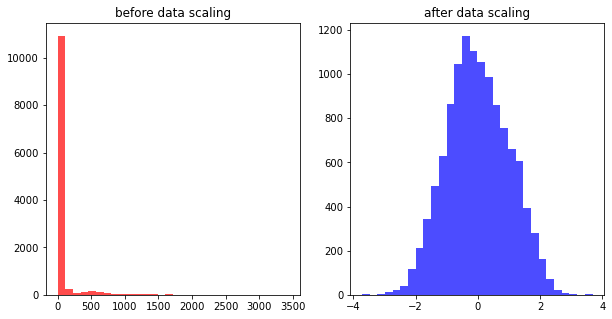

In [23]:
# 시각화 결과

# 스케일링 데이터
X_train_scaled_ss = X_train_sc.reshape(398*30,1)

# 오리지널 데이터
X_train_data = np.array(X_train).reshape(398*30,1)

fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
axes[0].set_title('before data scaling')
axes[1].hist(X_train_scaled_ss, bins=30, color= 'blue', alpha = 0.7)
axes[1].set_title('after data scaling')

plt.show()

## 3) 차원축소

### (1) PCA 
- 속도 개선
- 예측 성능이 떨어질 수 있지만 속도가 많이 상승 됨
- 데이터 스케일에 따라 각 주성분이 설명가능한 분산량이 달라질 수 있기 때문에 스케일링 필수

In [49]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [53]:
# PCA 진행
from sklearn.decomposition import PCA

pca = PCA(n_components=30) # 처음 n_components는 컬럼의 갯수로 설정
X_train_pca= pca.fit(X_train_scale)

print(pca.explained_variance_ratio_)
variance = 0
count= 0
for i in pca.explained_variance_ratio_:
    variance = variance+i
    count +=1
    if variance >= 0.8:
        print('주성분의 갯수: ', count)
        break

[4.36153043e-01 1.90083388e-01 1.00465615e-01 6.70581605e-02
 5.13543018e-02 4.16793393e-02 2.23069571e-02 1.60161037e-02
 1.37365374e-02 1.16465643e-02 1.01941773e-02 8.76268247e-03
 7.82486100e-03 5.30645491e-03 3.35654138e-03 2.72441795e-03
 2.14229377e-03 1.90426646e-03 1.74483937e-03 1.03254962e-03
 1.01764670e-03 9.89137577e-04 7.90872838e-04 5.66370681e-04
 5.58560798e-04 2.70876684e-04 2.33826279e-04 4.73295473e-05
 2.75788101e-05 4.70647181e-06]
주성분의 갯수:  5


In [54]:
# 주성분의 갯수를 5로 설정 -> n_components =5
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)

df_pca = pd.DataFrame(data= X_train_pca,columns=['pc1','pc2','pc3','pc4','pc4'])
df_pca.head()

,pc1,pc2,pc3,pc4,pc4
0,-3.203576,-1.215161,0.307576,1.049638,0.758866
1,-0.789334,-2.515797,-1.940244,0.435559,0.109940
2,-3.371162,2.514836,-1.604829,-1.557422,-0.210503
3,8.990741,1.934468,-1.155916,-3.643167,-0.994379
4,4.233589,4.779113,-2.898697,1.287961,1.267835


### (2) LDA
- LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원축소
- PCA는 입력데이터의 변동성이 가장 큰 축을 찾고 LDA는 입력데이터의 결정값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
- 즉, LDA는 클래스 분리를 최대화하는 축는 찾기 위해 클래스 간 분산을 최대화하고 클래스 내부 분산은 최대한 작게 가져간다.

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train_scale,y_train)
X_train_lda = lda.transform(X_train_scale)

df_lda = pd.DataFrame(data= X_train_lda,columns=['lda1'])
df_lda.head()

,lda1
0,-1.677528
1,0.968498
2,-2.277935
3,3.838906
4,1.513558


## 4) 데이터 불균형 처리

In [68]:
df = pd.read_csv("./data/diabetes_for_test.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


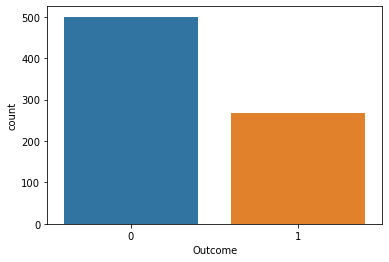

0의 비율: 65.1%
1의 비율: 34.9%


In [88]:
# 시각화
sns.countplot(x='Outcome', data =df )
plt.show()
print('0의 비율: {}%'.format(round(len(df[df['Outcome']==0])/len(df)*100,2)))
print('1의 비율: {}%'.format(round(len(df[df['Outcome']==1])/len(df)*100,2)))

In [96]:
X = df.drop(columns='Outcome')
y = df[['Outcome']]

### (1) 언더샘플링

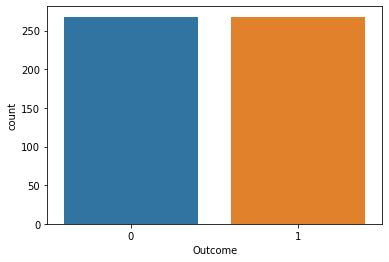

기존 0의 수:  500
기존 1의 수:  268
언더샘플링 이후 0의수:  268


In [102]:
# Random UnderSampling
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler()
X_under, y_under = sampler.fit_resample(X,y)
sns.countplot(y_under['Outcome'])
plt.show()

print('기존 0의 수: ', len(df[df['Outcome']==0]))
print('기존 1의 수: ', len(df[df['Outcome']==1]))
print('언더샘플링 이후 0의수: ', len(y_under[y_under['Outcome']==0]))

### (2) 오버샘플링

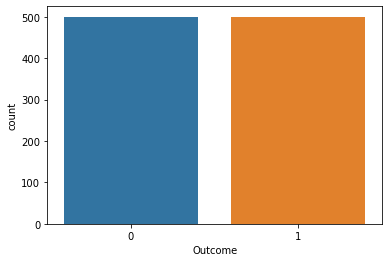

In [103]:
# RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
X_over, y_over = sampler.fit_resample(X,y)
sns.countplot(y_over['Outcome'])
plt.show()

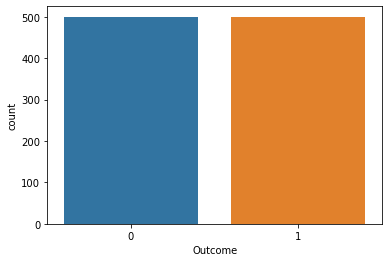

In [104]:
# SMOTE
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_smote, y_smote = sampler.fit_resample(X,y)
sns.countplot(y_smote['Outcome'])
plt.show()